In [1]:
number_iteration=10000;
J1=0.5
J2=J1;

In [2]:
# Quantum mechanics
from qutip import *
# Core libraries
import numpy as np
import pandas as pd
import random
import random as ra
# Machine learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Machine learning - Scikit-learn
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
# Other ML libraries
import xgboost as xgb
from catboost import CatBoostRegressor 
# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
# Utilities
from collections import OrderedDict

In [3]:
def Negativity(ρ):
    return round(abs(negativity(ρ,0)),7)
def Positioned_α(Dim_1,Dim_2):
    n=[0, 1, 0.5, 0.5]
    λ = [random.choice(n) for i in range(Dim_1*Dim_2)]
    μ=0; σ=1; a=0; b=1; G=1; U=0; 
    α=[G*(λ[i]*np.random.normal(μ,σ)+(1-λ[i])*1j*np.random.normal(μ,σ))+U*(λ[i]*ra.uniform(a,b)+(1-λ[i])*1j*ra.uniform(a,b)) for i in range(Dim_1*Dim_2)]
    return α

def Positioned_state(α,Basis,index,number_iteration):
    N=len(Basis)
    values = [0] * N
    # Randomly choose two unique positions
    R=(index/number_iteration)*N
    positions = random.sample(range(N), round(R+0.5))
    
    for pos in positions:
        values[pos] = 1
    S=sum([values[i]*α[i]*Basis[i] for i in range(N)])
    return S.unit()

In [4]:
#############################################################################################################################

In [5]:

                            #This code is for generating random states and evaluating their (Entanglemnt)
#Concurrence and expectation  values for the states as  features

def create_states(J1,J2,number_iteration):
    Features={}
    Dim_1=int(2*J1+1); Dim_2=int(2*J2+1); 
    number_features=Dim_1*Dim_2
    #Features['J1']=[]; Features['J2']=[]; 
    for i in range(number_features):
        Features['α_'+str(i+1)+'_re']=[]
        #Features['α_'+str(i+1)+'_im']=[]
    Features['s']=[]
    Features['N']=[]
    #s=np.linspace(0,1,number_iteration-1)
    for r in range(1,number_iteration):
        
        if r<=0.7*number_iteration:
            μ=0; σ=1; a=0; b=1; G=0; U=1; R=0;
            α=[G*(np.random.normal(μ,σ)+R*1j*np.random.normal(μ,σ))+U*(ra.uniform(a,b)+R*1j*ra.uniform(a,b)) for i in range(Dim_1*Dim_2)]
            #α=Positioned_α(Dim_1,Dim_2)   #To mix the amplitudes to be real or pure or mix
            Basis=[tensor(basis(Dim_1,i),basis(Dim_2,j)) for i in range(Dim_1) for j in range(Dim_2)]
            ψ=Positioned_state(α,Basis,r,number_iteration)
            #ψ=sum([α[k]*Basis[k] for k in range(len(α))]).unit()
            s=ra.uniform(0,1)
            ρ_s=(1-s)*tensor(qeye(Dim_1),qeye(Dim_2))/max(Dim_1,Dim_2)**2+s*ket2dm(ψ)
            ρ_s=ρ_s.unit()
            #Features['J1'].append(J1); Features['J2'].append(J2); 
            for i in range(number_features):
                Features['α_'+str(i+1)+'_re'].append(((Basis[i]*ψ.dag()).tr()).real)
                #Features['α_'+str(i+1)+'_im'].append(((Basis[i]*ψ.dag()).tr()).imag)
            Features['s'].append(s)
            Features['N'].append(Negativity(ρ_s)/max(J1,J2))
        else:
            state=[]; Basis=[tensor(basis(Dim_1,i),basis(Dim_2,j)) for i in range(Dim_1) for j in range(Dim_2)]
            for i in range(Dim_1):
                for j in range(Dim_2):
                    if i==j:
                        state.append(ra.uniform(0.2,0.8)*tensor(basis(Dim_1,i),basis(Dim_2,j)))
                    else:
                        state.append(0*tensor(basis(Dim_1,i),basis(Dim_2,j)))
            ψ=sum(state).unit()
            s=ra.uniform(0,1)
            ρ=(1-s)*tensor(qeye(Dim_1),qeye(Dim_2))/max(Dim_1,Dim_2)**2+s*ket2dm(ψ)
            ρ=ρ.unit()
        
            #Features['J1'].append(J1); Features['J2'].append(J2); 
            for i in range(number_features):
                Features['α_'+str(i+1)+'_re'].append(((Basis[i]*ψ.dag()).tr()).real)
                #Features['α_'+str(i+1)+'_im'].append(((Basis[i]*ψ.dag()).tr()).imag)
            Features['s'].append(s)
            Features['N'].append(Negativity(ρ)/max(J1,J2))
            
    return Features

In [6]:
All_data=pd.DataFrame(create_states(J1,J2,number_iteration))
All_data=All_data.dropna()
All_data.to_csv('Wener states training for '+str(J1)+'.csv')

In [7]:
All_data

,α_1_re,α_2_re,α_3_re,α_4_re,s,N
0,0.000000,0.0,1.0,0.000000,0.604792,0.000000
1,0.000000,0.0,0.0,1.000000,0.798125,0.000000
2,0.000000,0.0,1.0,0.000000,0.926615,0.000000
3,0.000000,0.0,0.0,1.000000,0.708419,0.000000
4,0.000000,0.0,0.0,1.000000,0.955769,0.000000
...,...,...,...,...,...,...
9994,0.723098,0.0,0.0,0.690745,0.430940,0.145959
9995,0.727671,0.0,0.0,0.685926,0.873320,0.808458
9996,0.863214,0.0,0.0,0.504838,0.204963,0.000000
9997,0.458120,0.0,0.0,0.888890,0.706142,0.428179


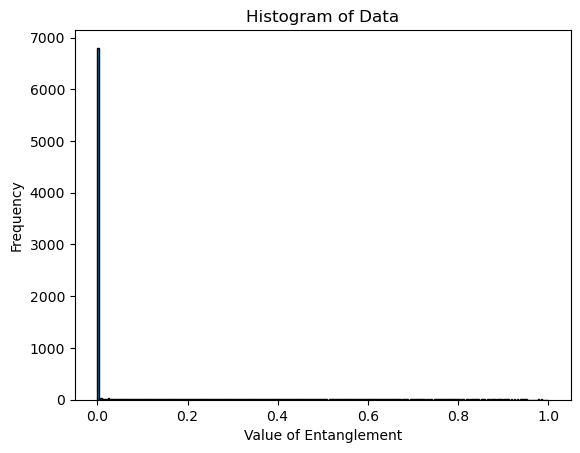

In [8]:

bins = [i/300 for i in range(0,301)]
plt.hist(All_data['N'], bins, edgecolor='black')  # 'bins' can be adjusted
plt.title('Histogram of Data')
plt.xlabel('Value of Entanglement')
plt.ylabel('Frequency')
plt.show()

In [9]:
##################################################################################################################

In [10]:

                            #This code is for generating werner states and evaluating their (Entanglemnt)
#Concurrence and expectation  values for the states as  features
def werner_states(J1,J2,number_iteration):
    Features={}
    Dim_1=int(2*J1+1); Dim_2=int(2*J2+1); 
    number_features=Dim_1*Dim_2
    #Features['J1']=[]; Features['J2']=[]; 
    for i in range(number_features):
        Features['α_'+str(i+1)+'_re']=[]
        #Features['α_'+str(i+1)+'_im']=[]
    Features['s']=[]
    Features['N']=[]
    
    for s in np.linspace(0,1,number_iteration):
        
        state=[]; Basis=[tensor(basis(Dim_1,i),basis(Dim_2,j)) for i in range(Dim_1) for j in range(Dim_2)]
        for i in range(Dim_1):
            for j in range(Dim_2):
                if i==j:
                    state.append(tensor(basis(Dim_1,i),basis(Dim_2,j)))
                else:
                    state.append(0*tensor(basis(Dim_1,i),basis(Dim_2,j)))
        ψ=sum(state).unit()

        ρ=(1-s)*tensor(qeye(Dim_1),qeye(Dim_2))/max(Dim_1,Dim_2)**2+s*ket2dm(ψ)
        ρ=ρ.unit()
        
        #Features['J1'].append(J1); Features['J2'].append(J2); 
        for i in range(number_features):
            Features['α_'+str(i+1)+'_re'].append(((Basis[i]*ψ.dag()).tr()).real)
            #Features['α_'+str(i+1)+'_im'].append(((Basis[i]*ψ.dag()).tr()).imag)
        Features['s'].append(s)
        Features['N'].append(Negativity(ρ)/max(J1,J2))
    return Features
        

In [11]:
tested_data=pd.DataFrame(werner_states(J1,J2,number_iteration))
tested_data.to_csv('Werner states tested for '+str(J1)+'.csv')

In [12]:
tested_data

,α_1_re,α_2_re,α_3_re,α_4_re,s,N
0,0.707107,0.0,0.0,0.707107,0.0000,0.00000
1,0.707107,0.0,0.0,0.707107,0.0001,0.00000
2,0.707107,0.0,0.0,0.707107,0.0002,0.00000
3,0.707107,0.0,0.0,0.707107,0.0003,0.00000
4,0.707107,0.0,0.0,0.707107,0.0004,0.00000
...,...,...,...,...,...,...
9995,0.707107,0.0,0.0,0.707107,0.9996,0.99940
9996,0.707107,0.0,0.0,0.707107,0.9997,0.99955
9997,0.707107,0.0,0.0,0.707107,0.9998,0.99970
9998,0.707107,0.0,0.0,0.707107,0.9999,0.99985
